# Exploratory Data Analysis and Modelling

## Importing Necessary Libraries

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Reading the CSV file

In [119]:
track_df = pd.read_csv('spotifytrackinfo.csv')
track_df.head(1)

,Unnamed: 0,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,mood
0,0,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,Marvin Gaye,0.663,0.6,7,-10.87,1,0.032,0.43,0.0,0.184,0.8,129.991,spotify:track:7tqhbajSfrz2F7E1Z75ASX,151667,4,happy


Since we already have an index column, we can drop the index.

In [120]:
track_df.drop('Unnamed: 0', inplace=True, axis=1)
track_df.head(1)

,track_id,track_name,first_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,mood
0,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,Marvin Gaye,0.663,0.6,7,-10.87,1,0.032,0.43,0.0,0.184,0.8,129.991,spotify:track:7tqhbajSfrz2F7E1Z75ASX,151667,4,happy


# Exploring the Data

In [121]:
track_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,0.610639,0.556466,5.149296,-8.322734,0.706338,0.065444,0.365333,0.056656,0.169778,0.477549,118.535581,211259.254930,3.895775
std,0.147548,0.222184,3.564007,3.620045,0.455599,0.065977,0.316665,0.173492,0.135339,0.242011,28.194598,51346.174221,0.377834
min,0.112000,0.033200,0.000000,-24.646000,0.000000,0.023600,0.000008,0.000000,0.023200,0.027700,46.923000,87000.000000,1.000000
25%,0.511000,0.392000,2.000000,-10.477750,0.000000,0.032400,0.070225,0.000000,0.096775,0.266000,97.040750,176354.500000,4.000000
50%,0.621000,0.568500,5.000000,-7.753500,1.000000,0.041950,0.271000,0.000034,0.115000,0.470500,118.391500,207527.500000,4.000000
75%,0.715000,0.731000,8.000000,-5.642000,1.000000,0.066625,0.635250,0.004542,0.189000,0.674000,135.232500,240149.750000,4.000000
max,0.978000,0.997000,11.000000,0.080000,1.000000,0.563000,0.993000,0.949000,0.951000,0.980000,209.942000,486187.000000,5.000000


## Checking if any missing values present

In [122]:
print (track_df.isnull().values.any())

False


In [123]:
# missing values for each feature
# verfying all should be 0
print (track_df.isnull().sum())

track_id            0
track_name          0
first_artist        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
uri                 0
duration_ms         0
time_signature      0
mood                0
dtype: int64


## Exploring relationship between features using correlation

In [124]:
features_df = track_df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

# scaling data
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(features_df)
features_df = pd.DataFrame(scaled_df, columns=features_df.columns)
features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.636259,0.588089,0.636364,0.557146,1.0,0.015573,0.433027,0.000000,0.173313,0.810984,0.509560
1,0.479215,0.396140,0.363636,0.533649,0.0,0.182425,0.460217,0.000018,0.101099,0.511708,0.191671
2,0.531178,0.399253,0.000000,0.562485,1.0,0.020949,0.639474,0.000000,0.078573,0.699674,0.353597
3,0.758661,0.346337,0.181818,0.542749,1.0,0.014090,0.688819,0.000017,0.062298,0.532710,0.347800
4,0.621247,0.283046,0.818182,0.614859,1.0,0.029106,0.574015,0.000007,0.051196,0.606217,0.436422


In [125]:
# finding correlation between features
corr_matrix = features_df.corr()
print (corr_matrix)

                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.328006  0.024707  0.292807 -0.141857   
energy                0.328006  1.000000  0.009986  0.785707 -0.135593   
key                   0.024707  0.009986  1.000000 -0.012389 -0.105786   
loudness              0.292807  0.785707 -0.012389  1.000000 -0.097724   
mode                 -0.141857 -0.135593 -0.105786 -0.097724  1.000000   
speechiness           0.226337  0.142866  0.038207  0.161497 -0.130627   
acousticness         -0.373065 -0.732727 -0.017916 -0.601154  0.105797   
instrumentalness     -0.089933 -0.106008 -0.002945 -0.251905 -0.009051   
liveness             -0.014417  0.165957  0.013753  0.135028 -0.054065   
valence               0.460216  0.471141  0.006531  0.294851 -0.044409   
tempo                -0.058673  0.165064  0.020305  0.110527 -0.001124   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.226337     -0

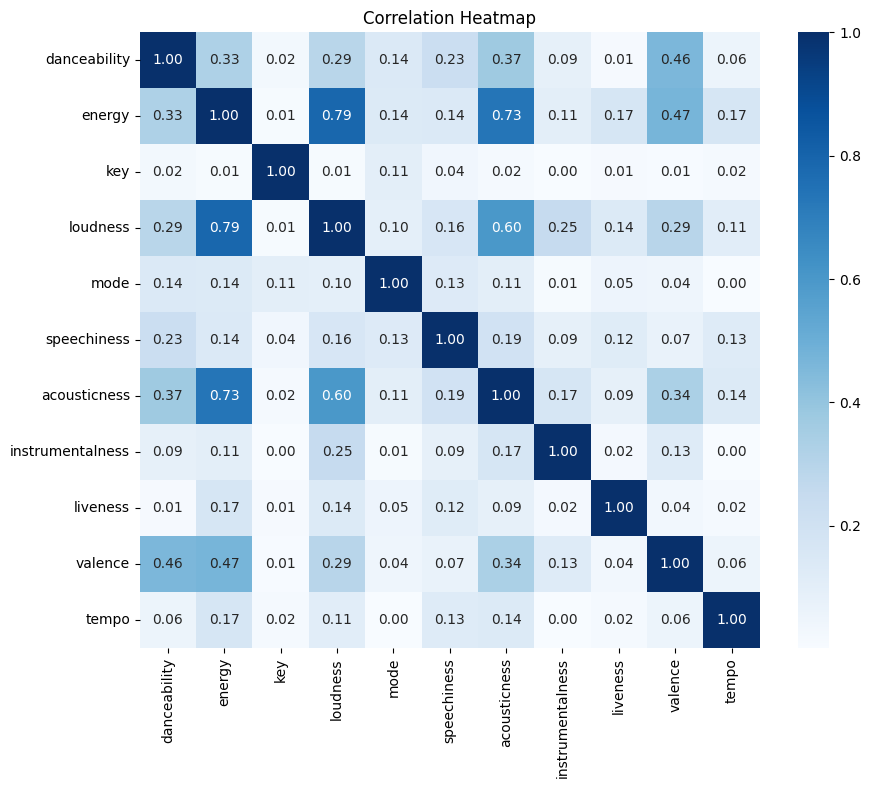

In [126]:
#For better visualizaion, using a heatmap
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.heatmap(abs(corr_matrix), annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

`Loudness` and `Energy` have an almost 80% correlation. While we can drop one of these, we can run our model first with both of them as features, and second time, with one of them dropped. We drop the one with a lower variance since theoretically, it will have lesser explainaibility capacity. Then comparing the performance, we can make a decision.

In [127]:
variance_loudness = np.var(features_df['loudness'])
variance_energy = np.var(features_df['energy'])

print(variance_loudness, variance_energy)

0.02141974773298273 0.053106496444470436


Hence we can drop `Loudness` as a feature for our check.

## Encoding our categorical classes

We will use One Hot Encoding since there is no order to the classes. We do not want to introduce bias in our models and force an order. It must be equally likely to pick any of the classes. 

In [128]:
encoder = LabelEncoder()
encoder.fit(track_df.mood)
encoded_mood = encoder.transform(track_df.mood)

np.unique(encoded_mood)

array([0, 1, 2, 3])

In [129]:
encoder.inverse_transform([0,1,2,3])

array(['calm', 'energetic', 'happy', 'sad'], dtype=object)

In [130]:
track_df['y'] = encoded_mood 

## Choosing an appropriate model with Stratified K fold Cross Validation

We know the features are in `features_df` while the target classes are in `track_df['y]`. First let us perform a check with two models, kNN and Random Forest to check the performance of the model with 
1. all the features 
2. `Loudness` droppped

## Selecting a Model using K Fold Cross Validation (with all the features)

### kNN

In [131]:
#knn
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import statistics as stat

knn = KNeighborsClassifier(n_neighbors=10)
print("knn with 10 nn: ",stat.mean(cross_val_score(knn, features_df,track_df['y'], cv = 15)))



knn = KNeighborsClassifier(n_neighbors=20)
print("knn with 20 nn: ",stat.mean(cross_val_score(knn, features_df,track_df['y'], cv = 15)))


knn = KNeighborsClassifier(n_neighbors=100)
print("knn with 100 nn: ",stat.mean(cross_val_score(knn, features_df,track_df['y'], cv = 15)))

knn with 10 nn:  0.4999850690556178
knn with 20 nn:  0.5211048898842852
knn with 100 nn:  0.5091377379619261


We are also noting that the model performs similary for 10,20 and 100 nearest neighbors. The max performance is achieved at n = 20. Hence we are better off choosing _20 nearest neighbors_.

### Random Forests

In [132]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
print("rf with 100 trees: ",stat.mean(cross_val_score(rf, features_df,track_df['y'], cv = 15)))

rf = RandomForestClassifier(n_estimators=200)
print("rf with 200 trees: ",stat.mean(cross_val_score(rf, features_df,track_df['y'], cv = 15)))

rf = RandomForestClassifier(n_estimators=500)
print("rf with 500 trees: ",stat.mean(cross_val_score(rf, features_df,track_df['y'], cv = 15)))

rf with 100 trees:  0.5414333706606943
rf with 200 trees:  0.5436207540126913
rf with 500 trees:  0.5400671892497201


Again, we are better off using n = 200 trees since the model plateaus with increase in number of trees. 200 trees (which is the default number of trees in the model) is sufficient to use as a parameter for our model.

## Cross Validating with Loudness dropped as a feature

In [133]:
# since loudness has the lower variance, we are dropping it from the track features
features_df2 = features_df.drop('loudness', axis=1)
features_df2.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.636259,0.588089,0.636364,1.0,0.015573,0.433027,0.000000,0.173313,0.810984,0.509560
1,0.479215,0.396140,0.363636,0.0,0.182425,0.460217,0.000018,0.101099,0.511708,0.191671
2,0.531178,0.399253,0.000000,1.0,0.020949,0.639474,0.000000,0.078573,0.699674,0.353597
3,0.758661,0.346337,0.181818,1.0,0.014090,0.688819,0.000017,0.062298,0.532710,0.347800
4,0.621247,0.283046,0.818182,1.0,0.029106,0.574015,0.000007,0.051196,0.606217,0.436422


Doing the same that we did above, but with modified features dataframe.

In [134]:
#knn
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import statistics as stat

knn = KNeighborsClassifier(n_neighbors=10)
print("knn with 10 nn: ",stat.mean(cross_val_score(knn, features_df2,track_df['y'], cv = 15)))



knn = KNeighborsClassifier(n_neighbors=20)
print("knn with 20 nn: ",stat.mean(cross_val_score(knn, features_df2,track_df['y'], cv = 15)))


knn = KNeighborsClassifier(n_neighbors=100)
print("knn with 100 nn: ",stat.mean(cross_val_score(knn, features_df2,track_df['y'], cv = 15)))

knn with 10 nn:  0.49782754759238523
knn with 20 nn:  0.5056065696155282
knn with 100 nn:  0.5084135871593878


In [135]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
print("rf with 100 trees: ",stat.mean(cross_val_score(rf, features_df2,track_df['y'], cv = 15)))

rf = RandomForestClassifier(n_estimators=200)
print("rf with 200 trees: ",stat.mean(cross_val_score(rf, features_df2,track_df['y'], cv = 15)))

rf = RandomForestClassifier(n_estimators=500)
print("rf with 500 trees: ",stat.mean(cross_val_score(rf, features_df2,track_df['y'], cv = 15)))

rf with 100 trees:  0.5343934303844718
rf with 200 trees:  0.5386188876446435
rf with 500 trees:  0.5329451287793953


This is comparatively worse than with the model trained with all of the features. Hence, we keep all of the features!

In [136]:
#delete the dataframe since we do not need it!
del(features_df2)